#### 1. Tải bộ dữ liệu: Các bạn tải bộ dữ liệu breast-cancer.csv tại [đây](https://drive.google.com/file/d/1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6/view?usp=drive_link).

In [2]:
#https://drive.google.com/file/d/1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6/view?usp=drive_link
!gdown 1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6

Downloading...
From: https://drive.google.com/uc?id=1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6
To: /home/minhmap/DATA/2.AIO2023/Code/AIO2023/Module_4/SVM/breast-cancer.csv
100%|███████████████████████████████████████| 24.4k/24.4k [00:00<00:00, 710kB/s]


#### 2. Import các thư viện cần thiết:

In [1]:
import numpy as np
import pandas as pd # đọc file csv
import matplotlib.pyplot as plt # trực quan thư viện

from sklearn.svm import SVC # Support Vector Classifier
from sklearn.preprocessing import (
    StandardScaler, 
    LabelEncoder, 
    OneHotEncoder, 
    OrdinalEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



Bad key "text.kerning_factor" on line 4 in
/home/minhmap/anaconda3/envs/minh_env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


#### 3. Đọc dữ liệu: 
Sử dụng pandas, ta đọc dữ liệu từ file .csv lên như sau:

In [2]:
dataset_path = "breast-cancer.csv"
df = pd.read_csv(dataset_path, names=['ages', 'meonpause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'label'])
display(df)

,ages,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ages         286 non-null    object
 1   meonpause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   label        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


#### 4. Tiền xử lý dữ liệu: 
Quan sát bộ dữ liệu trên, có thể nhận ra bộ dữ liệu hiện tại có nhiều
vấn đề cần chúng ta giải quyết trước khi đưa vào huấn luyện. Trong đó, dễ thấy chúng ta
cần phải mã hóa các cột dữ liệu dạng categorical và giải quyết các missing values. Các bước
thực hiện như sau:

(a) Filling missing values: Từ kết quả df.info() , ta có thể thấy các cột thuộc tính node-
caps và breast-quad đang không có đủ 286 non-null values, đồng nghĩa rằng hai cột
này đang chứa missing values. Việc giải quyết vấn đề này sẽ có rất nhiều cách, song để
đơn giản hóa vấn đề, chúng ta sẽ áp dụng chiến lược khỏa lắp các missing values bằng
giá trị xuất hiện nhiều nhất trong cột tương ứng. Ta thực hiện như sau:

In [4]:
print(df['breast-quad'].mode()[0])

'left_low'


In [5]:
df['node-caps'] = df['node-caps'].fillna(df['node-caps'].mode()[0]) # [0] ??

In [6]:
df['breast-quad'] = df['node-caps'].fillna(df['breast-quad'].mode()[0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ages         286 non-null    object
 1   meonpause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   label        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


Ở đoạn code trên, ta sử dụng hàm mode() (các bạn có thể đọc thêm về hàm này tại
[đây](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)) để tìm ra giá trị xuất hiện nhiều nhất, sau đó sử dụng hàm fillna() để gán giá trị
này vào các ô missing.

(b) Encode categorical features: Toàn bộ các cột thuộc tính của bộ dữ liệu đều ở dạng
categorical. Vì vậy, ta cần mã hóa chúng thành dạng số trước khi đưa vào huấn luyện
mô hình. Để thực hành các kiểu encode khác nhau, trong bài này chúng ta sẽ sử dụng cả hai OneHotEncoder() và OrdinalEncoder() cho một số cột thuộc tính khác nhau. Đầu
tiên, ta tách các cột features và label thành hai biến riêng:

In [8]:
y = df['label']
X = df.drop('label', axis=1)

Tiếp đến, ta xác định tên các cột sẽ sử dụng OrdinalEncoder() và các cột sẽ sử dụng
OneHotEncoder():

In [10]:
df.describe()

,ages,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
count,286,286,286,286,286,286,286,286,286,286
unique,6,3,11,7,2,3,2,2,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','no','no','no-recurrence-events'
freq,96,150,60,213,230,130,152,230,218,201


In [12]:
for col in df.columns:
    n_unique = df[col].unique()
    print(f"{col}: {n_unique}")

ages: ["'40-49'" "'50-59'" "'60-69'" "'30-39'" "'70-79'" "'20-29'"]
meonpause: ["'premeno'" "'ge40'" "'lt40'"]
tumor-size: ["'15-19'" "'35-39'" "'30-34'" "'25-29'" "'40-44'" "'10-14'" "'0-4'"
 "'20-24'" "'45-49'" "'50-54'" "'5-9'"]
inv-nodes: ["'0-2'" "'3-5'" "'15-17'" "'6-8'" "'9-11'" "'24-26'" "'12-14'"]
node-caps: ["'yes'" "'no'"]
deg-malig: ["'3'" "'1'" "'2'"]
breast: ["'right'" "'left'"]
breast-quad: ["'yes'" "'no'"]
irradiat: ["'no'" "'yes'"]
label: ["'recurrence-events'" "'no-recurrence-events'"]


In [13]:
non_ran_features = ['meonpause', 'node-caps', 'breast', 'breast-quad', 'irradiat']
df[non_ran_features]

,meonpause,node-caps,breast,breast-quad,irradiat
0,'premeno','yes','right','yes','no'
1,'ge40','no','right','no','no'
2,'ge40','no','left','no','no'
3,'premeno','yes','right','yes','yes'
4,'premeno','yes','left','yes','no'
...,...,...,...,...,...
281,'ge40','yes','left','yes','no'
282,'premeno','yes','left','yes','yes'
283,'premeno','yes','right','yes','no'
284,'premeno','no','right','no','no'


In [14]:
rank_features = ['ages', 'tumor-size', 'inv-nodes', 'deg-malig']
df[rank_features]

,ages,tumor-size,inv-nodes,deg-malig
0,'40-49','15-19','0-2','3'
1,'50-59','15-19','0-2','1'
2,'50-59','35-39','0-2','2'
3,'40-49','35-39','0-2','3'
4,'40-49','30-34','3-5','2'
...,...,...,...,...
281,'50-59','30-34','6-8','2'
282,'50-59','25-29','3-5','2'
283,'30-39','30-34','6-8','2'
284,'50-59','15-19','0-2','2'


In [20]:
transformer = ColumnTransformer(
    transformers = [
        ("OneHot", OneHotEncoder(drop='first'), non_ran_features),
        ("Ordinal", OrdinalEncoder(), rank_features)
    ],
    remainder = 'passthrough'
)
X_transformed = transformer.fit_transform(X)

Như vậy ta đã encode xong các thuộc tính. Để có thể quan sát dữ liệu sau khi encode
một cách trực quan, ta sẽ biến đổi biến X_transformed thành DataFrame như sau:

In [21]:
onehot_features = transformer.named_transformers_['OneHot'].get_feature_names(non_ran_features)
all_features = onehot_features.tolist() + rank_features

In [22]:
X_encoded = pd.DataFrame(
    X_transformed, 
    columns=all_features
)

In [23]:
display(X_encoded)

,meonpause_'lt40',meonpause_'premeno',node-caps_'yes',breast_'right',breast-quad_'yes',irradiat_'yes',ages,tumor-size,inv-nodes,deg-malig
0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,1.0
3,0.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,0.0,2.0
4,0.0,1.0,1.0,0.0,1.0,0.0,2.0,5.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
281,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,5.0,1.0
282,0.0,1.0,1.0,0.0,1.0,1.0,3.0,4.0,4.0,1.0
283,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,5.0,1.0
284,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0


(c) Encode label: Label của bộ dữ liệu gồm có hai giá trị (class) là "recurrence-events"
và "no-recurrence-events". Tương tự như categorical features, ta cũng cần phải đưa
label này về dạng số. Trong sklearn, ta có LabelEncoder() chuyên dùng để encode các
label. Cách sử dụng như sau:

In [24]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [25]:
display(y_encoded)

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(d) Normalization: Cuối cùng, để thuận tiện trong việc training, ta cũng áp dụng kỹ thuật
chuẩn hóa dữ liệu vào các thuộc tính X như sau:

In [45]:
normalizer = StandardScaler()
X_normalized = normalizer.fit_transform(X_encoded)

5. Chia tập dữ liệu train, val: Sau khi hoàn tất tiền xử lý, ta bắt đầu phân chia tập dữ liệu
ban đầu thành hai tập con. Một tập "train" dùng cho việc huấn luyện mô hình, một tập
"val" dùng để đánh giá mô hình sau khi train. Tỉ lệ chia ở đây sẽ là 7:3.

In [48]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X_normalized, y_encoded,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

#### 6. Huấn luyện mô hình: Ta huấn luyện mô hình SVM trên tập train:

In [49]:
classifier = SVC(
    random_state=random_state
)
classifier.fit(X_train, y_train)

SVC(random_state=1)

#### 7. Đánh giá mô hình: 
Với mô hình đã huấn luyện, ta sẽ kiểm tra hiệu năng của nó thông qua
đánh giá trên tập val:

In [50]:
y_pred = classifier.predict(X_val)
scores = accuracy_score(y_pred, y_val)

print('Evaluation results on validation set:')
print(f'Accuract: {scores}')

Evaluation results on validation set:
Accuract: 0.6744186046511628


# Support Vector Regression (SVR):

1. Tải bộ dữ liệu: 
Các bạn tải bộ dữ liệu auto-insurance.csv tại [đây](https://drive.google.com/file/d/1PhfXJRPWHFGlcVOz_OCOM80SOUWzEmk5/view?usp=drive_link).

In [52]:
# https://drive.google.com/file/d/1PhfXJRPWHFGlcVOz_OCOM80SOUWzEmk5/view?usp=drive_link
!wget 1PhfXJRPWHFGlcVOz_OCOM80SOUWzEmk5

--2023-09-26 21:28:17--  http://1phfxjrpwhfglcvoz_ocom80souwzemk5/
Resolving 1phfxjrpwhfglcvoz_ocom80souwzemk5 (1phfxjrpwhfglcvoz_ocom80souwzemk5)... failed: Name or service not known.
wget: unable to resolve host address ‘1phfxjrpwhfglcvoz_ocom80souwzemk5’


#### 2. Import các thư viện cần thiết:

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### 3. Đọc bộ dữ liệu: Sử dụng pandas, các bạn đọc dữ liệu từ file .csv như sau:

In [27]:
dataset_path = 'auto-insurance.csv'
df = pd.read_csv(dataset_path, names=['n_claims', 'total_payment'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   n_claims       63 non-null     int64  
 1   total_payment  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


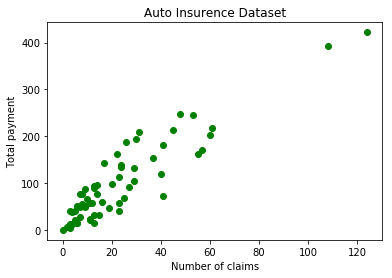

In [31]:
plt.scatter(df['n_claims'], df['total_payment'], color="green")
plt.title("Auto Insurence Dataset")
plt.xlabel("Number of claims")
plt.ylabel('Total payment')
plt.show()

#### 4. Chuẩn hóa dữ liệu (Normalization): 
Đối với bộ dữ liệu này, công việc tiền xử lý trở nên
nhẹ nhàng hơn khi ta chỉ cần áp dụng bước chuẩn hóa. Như vậy, ta làm như sau:

In [32]:
normalizer = StandardScaler()
df_normalized = normalizer.fit_transform(df)

#### 5. Chia bộ dữ liệu train, val: 
Ta tách bộ dữ liệu ban đầu thành hai tập con train và val như
sau:

In [34]:
X , y = df_normalized[:, 0], df_normalized[:, 1]
X = X.reshape(-1, 1)

test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

#### 6. Huấn luyện mô hình: 
Ta huấn luyện mô hình SVM trên tập train đã chia:

In [35]:
regressor = SVR()
regressor.fit(X_train, y_train)

SVR()

#### 7. Đánh giá mô hình: 
Để kiểm tra độ chính xác của mô hình đã huấn luyện, ta sẽ đánh giá
nó trên tập val như sau:

In [37]:
y_pred = regressor.predict(X_val)
mae = mean_absolute_error(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)

print('Evaluation results on validation set : ')
print(f' Mean Absolute Error : { mae }')
print(f' Mean Squared Error : { mse } ')

Evaluation results on validation set : 
 Mean Absolute Error : 0.4549655045116023
 Mean Squared Error : 0.5406791138567528 
